<a href="https://colab.research.google.com/github/hosseinrezaie0/FingerdDrectionDetection/blob/master/Project_CountDrectionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import cv2
import os

In [2]:
DATADIR = "/content/drive/My Drive/Projects/FingerDrectionDetection/train"
CATEGORIES = ['0','1','2','3','4','5']

# Preprocessing

### Get the data

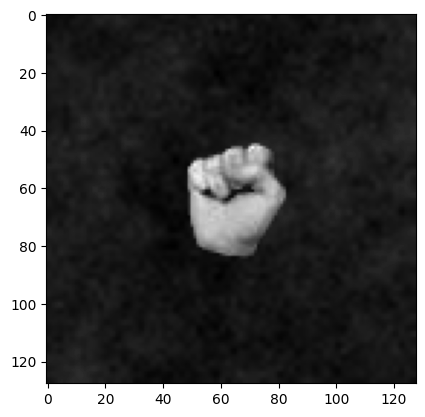

In [5]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)     #path to a class
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [6]:
print(img_array)

[[36 35 32 ... 50 50 50]
 [35 35 33 ... 49 49 49]
 [34 34 33 ... 47 46 45]
 ...
 [47 47 49 ... 43 41 41]
 [41 42 45 ... 41 36 34]
 [38 40 42 ... 39 34 31]]


In [7]:
img_array.shape

(128, 128)

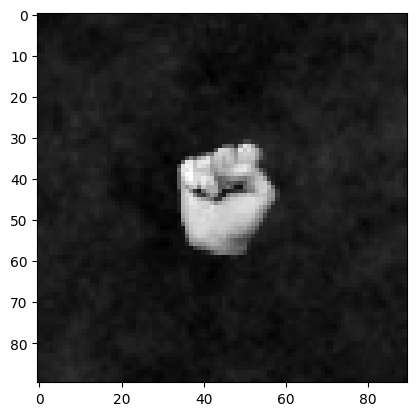

In [8]:
# resize the images
IMG_SIZE = 90

resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resized_img, cmap="gray")
plt.show()

In [20]:
# Create train dataset
train_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)     #path to a class
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      train_data.append([resized_img, class_num])
create_training_data()

In [21]:
len(train_data)

14400

In [22]:
# Shuffle

random.shuffle(train_data)

In [24]:
# Get the first 20 shuffled data
for sample in train_data[:20]:
  print(sample[1])

4
0
4
1
4
5
4
5
2
5
4
1
0
2
4
3
3
3
0
0


In [39]:
x_train = []
y_train = []

In [40]:
# Split the train data into x_train and y_train
for features, label in train_data:
  x_train.append(features)
  y_train.append(label)



In [41]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

In [42]:
x_train.shape

(14400, 90, 90, 1)

In [43]:
y_train.shape

(14400,)

In [44]:
# Save trian data

import pickle

pickle_out = open("x_train", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [45]:
# Load train data
pickle_in = open("x_train", "rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train", "rb")
y_train = pickle.load(pickle_in)

(14400, 90, 90, 1)